# K-Means

    step 1 - Choose K number of clusters
    step 2 - Select at random K points, the centroids (not necessarily from your dataset)
    step 3 -assign each data point to the closest centroid
    step 4 - Compute and place the new centroid of each cluster
    step 5 - Reassing each data point to the new closest centroid. If any reassigment took place, go to step 4, otherwise -END

In [25]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
from sklearn.datasets import make_blobs
blobs = make_blobs()
X= blobs[0]
y= blobs[1]

Text(0, 0.5, 'Y')

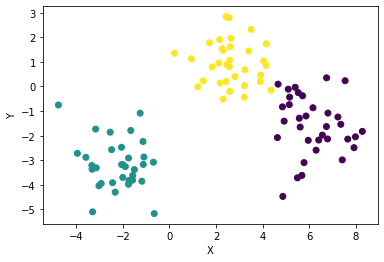

In [24]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Score')

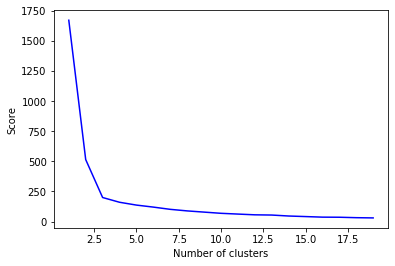

In [36]:
scores=[]

for i in range(1,20):
    K_model = KMeans(n_clusters=i)
    K_model.fit(X,y)
    scores.append(abs(K_model.score(X,y)))
    
plt.plot(np.arange(1,20), scores,'blue')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

In [38]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 4 - Clustering/Section 24 - K-Means Clustering/Mall_Customers.csv")

In [49]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
X = dataset.iloc[:,3:5].values
y=  dataset.iloc[:,-1].values

Text(0, 0.5, 'Spending Score (1-100)')

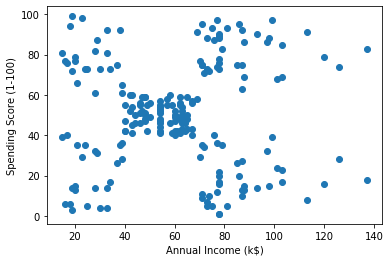

In [58]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])

Text(0, 0.5, 'Score')

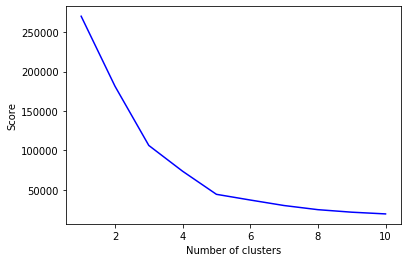

In [65]:
scores=[]

for i in range(1,11):
    K_model = KMeans(n_clusters=i, init='k-means++', max_iter=300)
    K_model.fit(X)
    scores.append(K_model.inertia_)
    
plt.plot(np.arange(1,11), scores,'blue')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

In [67]:
K_model = KMeans(n_clusters=5, init='k-means++', max_iter=300)
y_kmeans = K_model.fit_predict(X)

Text(0, 0.5, 'Spending Score (1-100)')

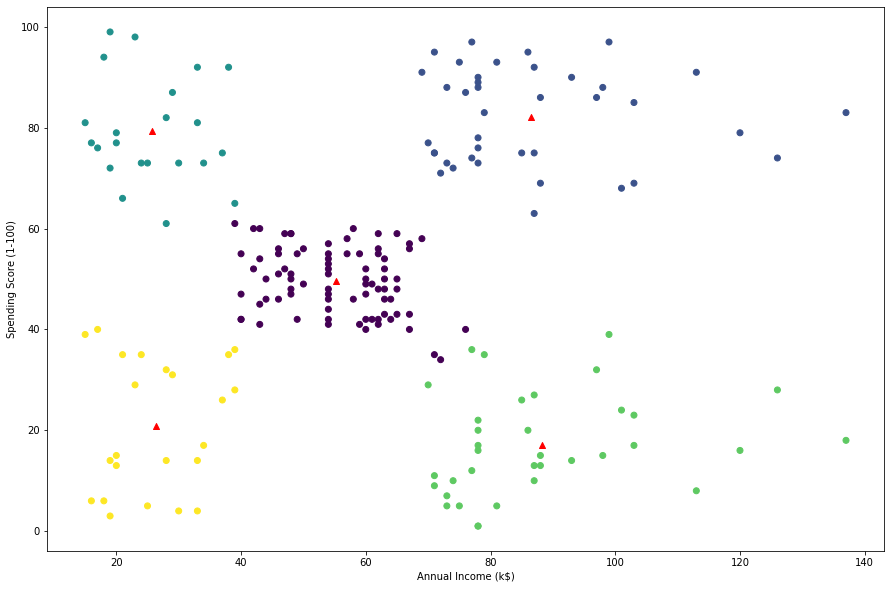

In [92]:
figure=plt.figure(figsize=(15,10))

plt.scatter(X[:,0], X[:,1], c=y_kmeans)
plt.scatter(K_model.cluster_centers_[:,0], K_model.cluster_centers_[:,1], marker='^', c='red')
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])

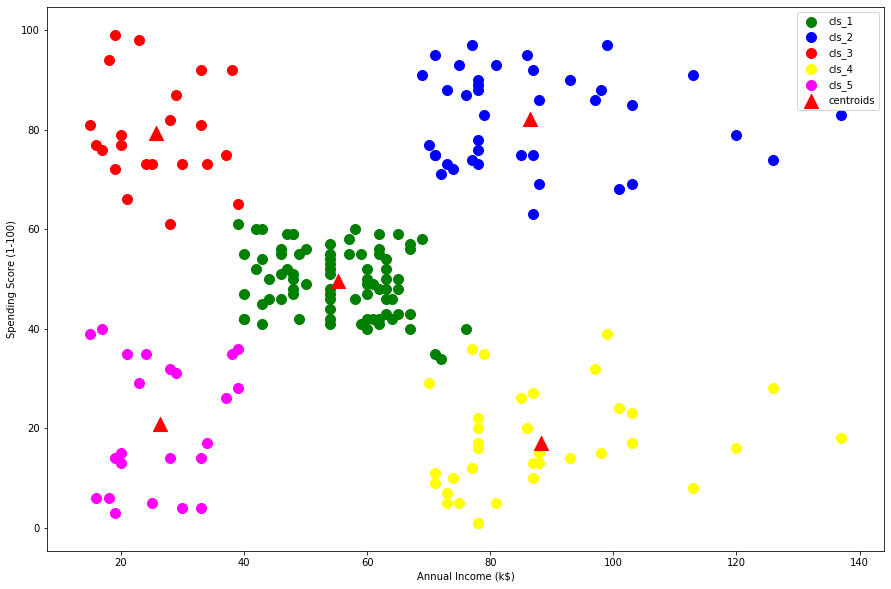

In [93]:
figure=plt.figure(figsize=(15,10))


plt.scatter(X[y_kmeans==0][:,0], X[y_kmeans==0][:,1], s=100, c='green', label = 'cls_1')
plt.scatter(X[y_kmeans==1][:,0], X[y_kmeans==1][:,1], s=100, c='blue', label = 'cls_2')
plt.scatter(X[y_kmeans==2][:,0], X[y_kmeans==2][:,1], s=100, c='red', label = 'cls_3')
plt.scatter(X[y_kmeans==3][:,0], X[y_kmeans==3][:,1], s=100, c='yellow', label = 'cls_4')
plt.scatter(X[y_kmeans==4][:,0], X[y_kmeans==4][:,1], s=100, c='magenta', label = 'cls_5')
plt.scatter(K_model.cluster_centers_[:,0], K_model.cluster_centers_[:,1], s=200, marker='^', c='red', label='centroids')
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.legend()
